<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/%EB%B6%84%EB%A5%98_%EC%8A%A4%ED%83%9C%ED%82%B9_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_data = cancer.data
y_label = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

# **기본 스태킹 모델**
* 스태킹 => 각각의 모델들을 최적 파라미터로 튜닝하여 최적으로 학습하여 스태킹 진행하여야 하므로 개인이 하기에는 시간이 많이 소요됨

In [ ]:
# 개별 모델 각각 만들어 결과를 합침
# 해당 예제에서 사용할 개별 모델 : KNN, RandomForest, DecisionTree, AdaBoost

knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)

In [ ]:
# 개별 모델의 스태킹으로 만들어진 데이터 세트로 학습 및 예측할 최종 모델 : LogisticRegression

lr = LogisticRegression(C=10)


In [ ]:
# 개별 모델 학습

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(accuracy_score(y_test, knn_pred))
print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, dt_pred))
print(accuracy_score(y_test, ada_pred))

0.9210526315789473
0.9649122807017544
0.9035087719298246
0.956140350877193


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred1 = np.transpose(pred)

print(pred.shape)
print(pred1.shape)
pred1

(4, 114)
(114, 4)


array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1,

In [ ]:
# 만들어진 데이터로 학습
lr.fit(pred1, y_test)
final_pred = lr.predict(pred1)
print(accuracy_score(y_test, final_pred))

0.9736842105263158


# **CV세트 기반 스태킹 모델**
* 오버피팅 개선을 위해 최종 메타모델을 위한 데이터세트 만들 때, 교차 검증 기반의 예측 결과 데이터세트를 이용
* 앞 예제에서 마지막 메타모델의 학습 시 y_test를 사용했기에 오버피팅 발생 가능
* 개별 모델들이 각각 교차 검증을 통해 최종 메타모델의 학습을 위한 스태킹 데이터와 테스트를 위한 스태킹 데이터를 생성함

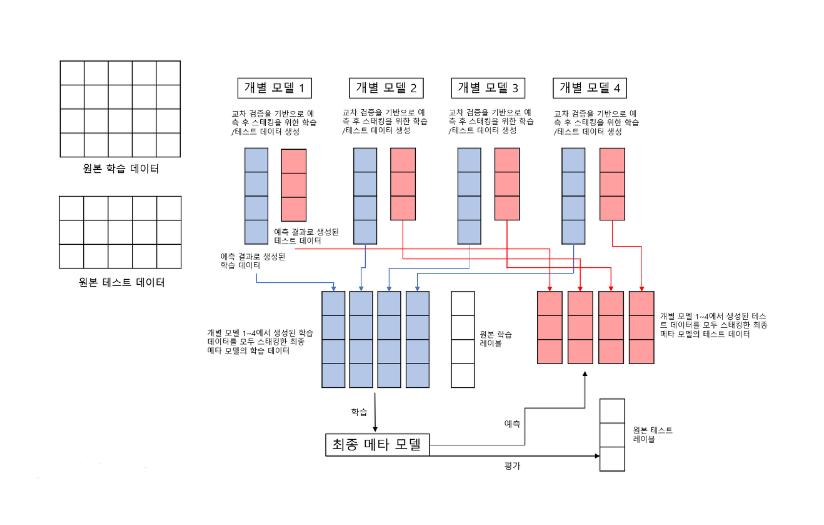

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 모델에서 최종 메타모델이 사용할 학습/테스트 데이터 생성을 위한 함수

def get_stacking_base_datasets(model, X_train, y_train, X_test, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train.shape[0] ,1 ))
    test_pred = np.zeros((X_test.shape[0], n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train)):
        # 입력된 학습 데이터에서 개별 모델이 학습/예측할 폴드 데이터 셋으로 분리
        # 즉, X_train으로 개별 모델은 학습과 예측하고, 그 결과로 최종 메타모델이 학습/예측할 데이터 셋 생성
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train[train_index] 
        y_tr = y_train[train_index] 
        X_te = X_train[valid_index]  
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        # X_train의 교차검증으로 학습한 개별 모델이 X_test로 테스트한 결과를 test_pred에 저장하여 이후에 최종 메타 모델이 사용
        test_pred[:, folder_counter] = model.predict(X_test)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# 내부 구동 이해

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=7, shuffle=False)
for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        print(train_index)
        print(valid_index)

	 폴드 세트:  0  시작 
[ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 3

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [ ]:
lr.fit(Stack_final_X_train, y_train)
stack_final = lr.predict(Stack_final_X_test)

print(accuracy_score(y_test, stack_final))

0.9736842105263158
